<ipython-input-1-1cb593b33ee9>:67: RuntimeWarning: divide by zero encountered in divide
  integrand = lambda beta: (beta - S1) * compute_D(beta) / F1_interp(beta)
<ipython-input-1-1cb593b33ee9>:68: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  integral, _ = quad(integrand, S1, S1_star, limit=1000)
<ipython-input-1-1cb593b33ee9>:68: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  integral, _ = quad(integrand, S1, S1_star, limit=1000)


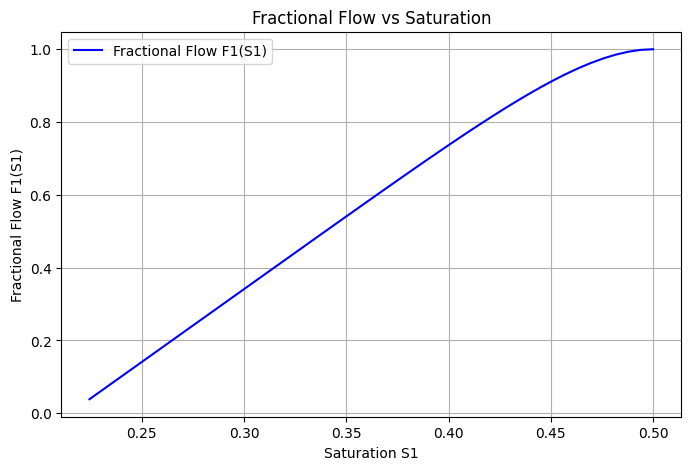

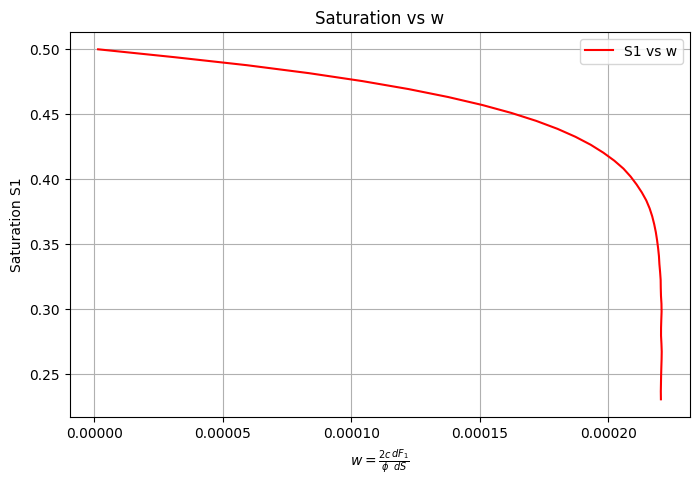

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.interpolate import interp1d
from scipy.interpolate import PchipInterpolator


# # Given parameters (for Case 2: Water displacing Hydrogen)
# phi = 0.25  # Porosity
# kr1_max, kr2_max = 0.15, 1.0  # Max relative permeabilities
# mu1, mu2 = 1e-3, 0.1e-3  # Viscosity
# Pc_max = 100e3  # Max capillary pressure
# c = 0.3  # Capillary exponent
# S1i, S2r = 0.2, 0.5  # Initial and residual saturations
# S1_star = 0.5  # Shock saturation
# a = 4
# b = 1.5
# K = 1e-13  # Permeability

# Case 2 Parameters
S1i = 0.2   # Initial saturation
S1_star = 0.5  # Final saturation
mu1 = 0.4e-3   # Water viscosity (Pa·s)
mu2 = 0.1e-3  # Hydrogen viscosity (Pa·s)
kr1_max = 0.4  # Maximum relative permeability
kr2_max = 0.8
a = 8  # Empirical parameter
b = 3
K = 1e-13  # Absolute permeability (m²)
Pc_max = 100000  # Maximum capillary pressure (Pa)
c = 0.3  # Capillary pressure exponent
phi = 0.25  # Porosity
S2r = 0.15  # Residual saturation

# Compute diffusion coefficient D

# Function to compute the diffusion coefficient D(S)
def compute_D(S1):
    denom = 1 - S2r - S1i
    Se = (S1 - S1i) / denom if denom != 0 else 0
    Se = np.clip(Se, 1e-10, 1-1e-10)  # Avoid numerical issues
    kr1 = kr1_max * Se**a
    kr2 = kr2_max * (1 - Se)**b
    term = (S1_star / S1i)**(-c) - 1
    dPc_dS1 = Pc_max * (c * (S1 / S1i)**(-c-1) / S1i) / term
    term1 = (kr1 / mu1) * (kr2 / mu2) / ((kr1 / mu1) + (kr2 / mu2))
    D = abs(term1 * K * dPc_dS1)
    return D

# Compute C²
def compute_C2():
    integrand = lambda beta: (beta - S1i) * compute_D(beta)
    integral, _ = quad(integrand, S1i, S1_star, limit=100)
    C2 = (phi / 2) * integral
    return C2


def solve_F1(S1_range, num_iterations=50):
    F1_values = (S1_range - S1i) / (S1_star - S1i)  # Initial guess

    for _ in range(num_iterations):
        F1_interp = interp1d(S1_range, F1_values, fill_value="extrapolate")
        C2 = compute_C2()
        C = np.sqrt(C2)

        for i, S1 in enumerate(S1_range):
            integrand = lambda beta: (beta - S1) * compute_D(beta) / F1_interp(beta)
            integral, _ = quad(integrand, S1, S1_star, limit=1000)
            F1_values[i] = 1 - (phi / (2 * C**2)) * integral

        F1_values = np.clip(F1_values, 0, 1)  # Ensure valid range

    return F1_values, C


# Compute omega(S1) and solve for S1(omega)
def compute_omega(S1_range, F1_values, C):
    """计算 omega(S1) = (2C/φ) * dF1/dS1"""
    dF1_dS1 = np.gradient(F1_values, S1_range, edge_order=2)  # 更稳定的二阶梯度计算

    # 避免极小值导致数值问题
    dF1_dS1 = np.clip(dF1_dS1, 1e-6, None)

    omega = (2 * C / phi) * dF1_dS1  # 计算 ω
    return omega


# Solve and plot
S1_range = np.linspace(S1i, S1_star, 50)
F1_solution, C_solution = solve_F1(S1_range)
# 计算 omega
omega_values = compute_omega(S1_range, F1_solution, C_solution)

# Plot Fractional Flow vs Saturation
plt.figure(figsize=(8, 5))
plt.plot(S1_range, F1_solution, label='Fractional Flow F1(S1)', color='b')
plt.xlabel('Saturation S1')
plt.ylabel('Fractional Flow F1(S1)')
plt.title('Fractional Flow vs Saturation')
plt.legend()
plt.grid()
plt.show()

# Plot Saturation vs Omega
plt.figure(figsize=(8, 5))
plt.plot(omega_values, S1_range, label='S1 vs w', color='r')
plt.xlabel('$w=\\frac{2c}{\\phi}\\frac{dF_1}{dS}$')
plt.ylabel('Saturation S1')
plt.title('Saturation vs w')
plt.legend()
plt.grid()
plt.show()



case3 analytical：

<ipython-input-8-39835f605f80>:67: RuntimeWarning: divide by zero encountered in divide
  integrand = lambda beta: (beta - S1) * compute_D(beta) / F1_interp(beta)
<ipython-input-8-39835f605f80>:68: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  integral, _ = quad(integrand, S1, S1_star, limit=1000)


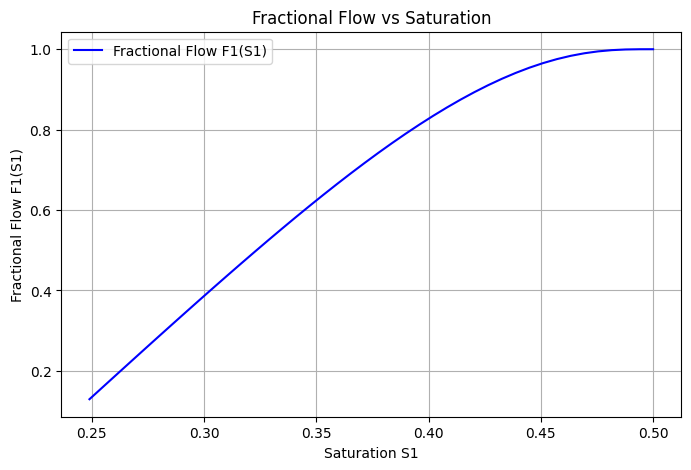

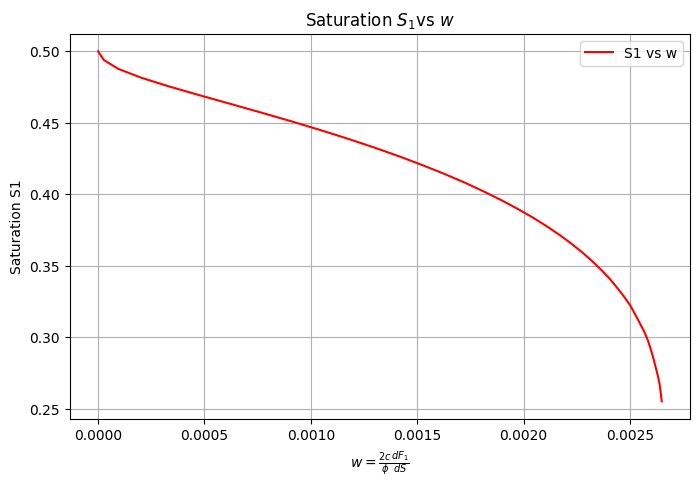

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.interpolate import interp1d
from scipy.interpolate import PchipInterpolator


# # Given parameters (for Case 2: Water displacing Hydrogen)
# phi = 0.25  # Porosity
# kr1_max, kr2_max = 0.15, 1.0  # Max relative permeabilities
# mu1, mu2 = 1e-3, 0.1e-3  # Viscosity
# Pc_max = 100e3  # Max capillary pressure
# c = 0.3  # Capillary exponent
# S1i, S2r = 0.2, 0.5  # Initial and residual saturations
# S1_star = 0.5  # Shock saturation
# a = 4
# b = 1.5
# K = 1e-13  # Permeability

# Case 2 Parameters
S1i = 0.2   # Initial saturation
S1_star = 0.5  # Final saturation
mu1 = 1e-3   # Water viscosity (Pa·s)
mu2 = 0.1e-3  # Hydrogen viscosity (Pa·s)
kr1_max = 0.15  # Maximum relative permeability
kr2_max = 1
a = 4  # Empirical parameter
b = 1.5
K = 1e-13  # Absolute permeability (m²)
Pc_max = 100000  # Maximum capillary pressure (Pa)
c = 0.3  # Capillary pressure exponent
phi = 0.25  # Porosity
S2r = 0.5  # Residual saturation

# Compute diffusion coefficient D

# Function to compute the diffusion coefficient D(S)
def compute_D(S1):
    denom = 1 - S2r - S1i
    Se = (S1 - S1i) / denom if denom != 0 else 0
    Se = np.clip(Se, 1e-10, 1-1e-10)  # Avoid numerical issues
    kr1 = kr1_max * Se**a
    kr2 = kr2_max * (1 - Se)**b
    term = (S1_star / S1i)**(-c) - 1
    dPc_dS1 = Pc_max * (c * (S1 / S1i)**(-c-1) / S1i) / term
    term1 = (kr1 / mu1) * (kr2 / mu2) / ((kr1 / mu1) + (kr2 / mu2))
    D = abs(term1 * K * dPc_dS1)
    return D

# Compute C²
def compute_C2():
    integrand = lambda beta: (beta - S1i) * compute_D(beta)
    integral, _ = quad(integrand, S1i, S1_star, limit=100)
    C2 = (phi / 2) * integral
    return C2


def solve_F1(S1_range, num_iterations=50):
    F1_values = (S1_range - S1i) / (S1_star - S1i)  # Initial guess

    for _ in range(num_iterations):
        F1_interp = interp1d(S1_range, F1_values, fill_value="extrapolate")
        C2 = compute_C2()
        C = np.sqrt(C2)

        for i, S1 in enumerate(S1_range):
            integrand = lambda beta: (beta - S1) * compute_D(beta) / F1_interp(beta)
            integral, _ = quad(integrand, S1, S1_star, limit=1000)
            F1_values[i] = 1 - (phi / (2 * C**2)) * integral

        F1_values = np.clip(F1_values, 0, 1)  # Ensure valid range

    return F1_values, C


# Compute omega(S1) and solve for S1(omega)
def compute_omega(S1_range, F1_values, C):
    """计算 omega(S1) = (2C/φ) * dF1/dS1"""
    dF1_dS1 = np.gradient(F1_values, S1_range, edge_order=2)  # 更稳定的二阶梯度计算

    # 避免极小值导致数值问题
    dF1_dS1 = np.clip(dF1_dS1, 1e-6, None)

    omega = (2 * C / phi) * dF1_dS1  # 计算 ω
    return omega


# Solve and plot
S1_range = np.linspace(S1i, S1_star, 50)
F1_solution, C_solution = solve_F1(S1_range)
# 计算 omega
omega_values = compute_omega(S1_range, F1_solution, C_solution)

# Plot Fractional Flow vs Saturation
plt.figure(figsize=(8, 5))
plt.plot(S1_range, F1_solution, label='Fractional Flow F1(S1)', color='b')
plt.xlabel('Saturation S1')
plt.ylabel('Fractional Flow F1(S1)')
plt.title('Fractional Flow vs Saturation')
plt.legend()
plt.grid()
plt.show()

# Plot Saturation vs Omega
plt.figure(figsize=(8, 5))
plt.plot(omega_values, S1_range, label='S1 vs w', color='r')
plt.xlabel('$w=\\frac{2c}{\\phi}\\frac{dF_1}{dS}$')
plt.ylabel('Saturation S1')
plt.title('Saturation $S_1$vs $w$')
plt.legend()
plt.grid()
plt.show()



<ipython-input-29-35aefec5ac0f>:56: RuntimeWarning: divide by zero encountered in divide
  integrand = lambda beta: (beta - S1) * compute_D(beta) / F1_interp(beta)
<ipython-input-29-35aefec5ac0f>:57: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  integral, _ = quad(integrand, S1, S1_star, limit=1000)


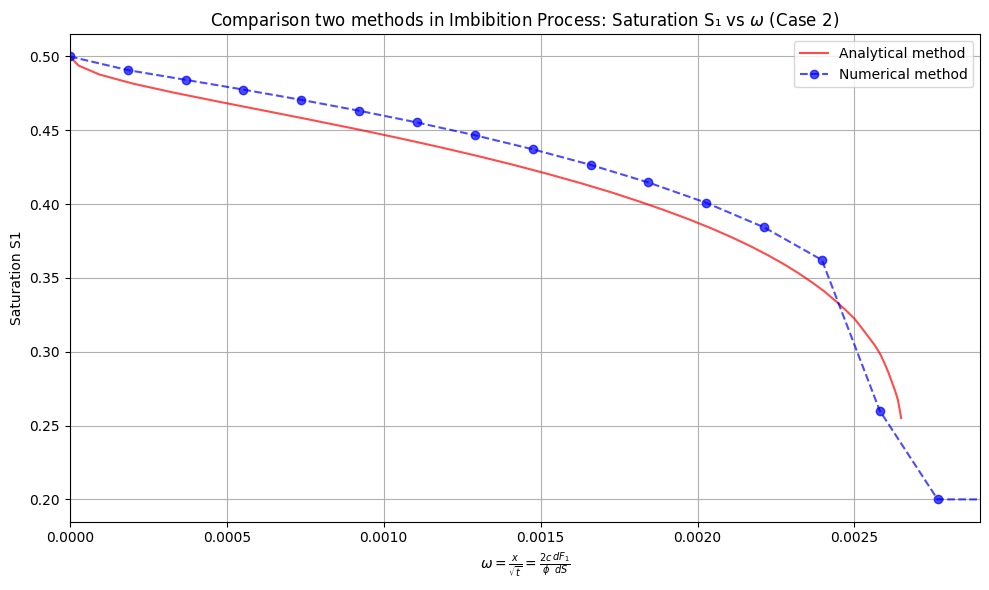

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.interpolate import interp1d

# ================================
# 公共参数 (Case 2: Water displacing Hydrogen)
# ================================
S1i    = 0.2     # 初始饱和度
S1_star = 0.5    # 入口/最大饱和度
mu1    = 1e-3    # 水的黏度 (Pa·s)
mu2    = 0.1e-3  # 氢气的黏度 (Pa·s)
kr1_max = 0.15
kr2_max = 1.0
a      = 4.0
b      = 1.5
K      = 1e-13   # 绝对渗透率 (m²)
Pc_max = 100e3   # 最大毛管压力 (Pa)
c      = 0.3     # 毛管压力指数
phi    = 0.25    # 孔隙度
S2r    = 0.5     # 非湿相残余饱和度

# =====================================
# 解析方法 (Analytical Method) 部分
# =====================================

def compute_D(S1):
    """计算扩散系数 D(S1)"""
    denom = 1 - S2r - S1i
    Se = (S1 - S1i) / denom if denom != 0 else 0
    Se = np.clip(Se, 1e-10, 1-1e-10)
    kr1 = kr1_max * Se**a
    kr2 = kr2_max * (1 - Se)**b
    term = (S1_star / S1i)**(-c) - 1
    # 计算 dPc/dS1，解析公式：
    dPc_dS1 = Pc_max * (c * (S1 / S1i)**(-c-1) / S1i) / term
    term1 = (kr1 / mu1) * (kr2 / mu2) / ((kr1 / mu1) + (kr2 / mu2))
    D = abs(term1 * K * dPc_dS1)
    return D

def compute_C2():
    """计算 C² = (phi/2)∫[S1i,S1_star] (β-S1i)*D(β)dβ"""
    integrand = lambda beta: (beta - S1i) * compute_D(beta)
    integral, _ = quad(integrand, S1i, S1_star, limit=100)
    C2 = (phi / 2) * integral
    return C2

def solve_F1(S1_range, num_iterations=50):
    """用 Picard 迭代求解 F₁(S₁)"""
    F1_values = (S1_range - S1i) / (S1_star - S1i)  # 初始猜测：线性插值
    for _ in range(num_iterations):
        F1_interp = interp1d(S1_range, F1_values, fill_value="extrapolate")
        C2 = compute_C2()
        C = np.sqrt(C2)
        for i, S1 in enumerate(S1_range):
            integrand = lambda beta: (beta - S1) * compute_D(beta) / F1_interp(beta)
            integral, _ = quad(integrand, S1, S1_star, limit=1000)
            F1_values[i] = 1 - (phi / (2 * C**2)) * integral
        F1_values = np.clip(F1_values, 0, 1)
    return F1_values, C

def compute_omega(S1_range, F1_values, C):
    """计算 ω(S₁) = (2C/φ)*(dF₁/dS₁)"""
    dF1_dS1 = np.gradient(F1_values, S1_range, edge_order=2)
    dF1_dS1 = np.clip(dF1_dS1, 1e-6, None)
    omega = (2 * C / phi) * dF1_dS1
    return omega

# 解析方法求解
S1_range = np.linspace(S1i, S1_star, 50)
F1_solution, C_solution = solve_F1(S1_range, num_iterations=50)
omega_analytical = compute_omega(S1_range, F1_solution, C_solution)

# =====================================
# 数值方法 (Numerical Method) 部分
# =====================================

def relative_permeability(S1, params):
    """计算相对渗透率：Se = (S1 - S1i)/(1-S2r-S1i)"""
    Se = (S1 - params['S1i']) / (1 - params['S2r'] - params['S1i'])
    Se = np.clip(Se, 0, 1)
    kr1 = params['kr1max'] * (Se ** params['a'])
    kr2 = params['kr2max'] * ((1 - Se) ** params['b'])
    return kr1, kr2

def capillary_pressure(S1, params):
    """Pc(S1) = Pcmax * [ (S1star/S1i)^(-c) - (S1/S1i)^(-c) ] / [ (S1star/S1i)^(-c) - 1 ]"""
    ratio = S1 / params['S1i']
    ratio_star = params['S1star'] / params['S1i']
    numerator = ratio_star ** (-params['c']) - ratio ** (-params['c'])
    denominator = ratio_star ** (-params['c']) - 1
    Pc = params['Pcmax'] * numerator / denominator
    return max(0, Pc)

def dPc_dS1_num(S1, params, delta=1e-6):
    """用差分法计算 dPc/dS1 (数值方法)"""
    if S1 <= params['S1i'] + delta:
        return (capillary_pressure(S1 + delta, params) - capillary_pressure(S1, params)) / delta
    else:
        return (capillary_pressure(S1 + delta, params) - capillary_pressure(S1 - delta, params)) / (2 * delta)

def diffusion_coefficient_num(S1, params):
    """D(S1) = -[ (kr1/mu1)*(kr2/mu2)/((kr1/mu1)+(kr2/mu2)) ] * K * dPc/dS1"""
    kr1_val, kr2_val = relative_permeability(S1, params)
    kr1_safe = max(1e-10, kr1_val)
    kr2_safe = max(1e-10, kr2_val)
    mobility1 = kr1_safe / params['mu1']
    mobility2 = kr2_safe / params['mu2']
    if mobility1 < 1e-10 or mobility2 < 1e-10:
        return 0
    D = - (mobility1 * mobility2) / (mobility1 + mobility2) * params['K'] * dPc_dS1_num(S1, params)
    return max(0, D)

def solve_imbibition_FD_explicit(params, L=1, T=6000, nx=100, nt=1000):
    """显式有限差分求解自发渗吸方程 (数值方法)"""
    dx = L / (nx - 1)
    dt = T / nt
    x = np.linspace(0, L, nx)
    t = np.linspace(0, T, nt)
    S = np.ones((nt, nx)) * params['S1i']
    S[:, 0] = params['S1star']
    for n in range(nt - 1):
        for i in range(1, nx - 1):
            D_plus = diffusion_coefficient_num(0.5*(S[n,i] + S[n,i+1]), params)
            D_minus = diffusion_coefficient_num(0.5*(S[n,i] + S[n,i-1]), params)
            flux_plus = D_plus * (S[n,i+1] - S[n,i])
            flux_minus = D_minus * (S[n,i] - S[n,i-1])
            S[n+1, i] = S[n, i] + dt/(params['phi']*dx*dx) * (flux_plus - flux_minus)
        S[n+1, 0] = params['S1star']
        S[n+1, -1] = S[n+1, -2]
        S[n+1, :] = np.clip(S[n+1, :], params['S1i'], params['S1star'])
    return x, t, S

# 数值方法参数字典 (与解析方法相同)
case2_params = {
    'mu1': 1e-3,
    'mu2': 0.1e-4,
    'kr1max': 0.15,
    'kr2max': 1.0,
    'a': 4.0,
    'b': 1.5,
    'S1i': S1i,
    'S2r': S2r,
    'K': K,
    'phi': phi,
    'Pcmax': Pc_max,
    'c': c,
    'S1star': S1_star
}

x_num, t_num, S_num = solve_imbibition_FD_explicit(case2_params)
t_index = 500
t_sel = t_num[t_index]
S_at_t = S_num[t_index, :]
omega_numerical = x_num / np.sqrt(t_sel)

# =====================================
# 将两种方法的结果在同一图中绘制
# =====================================
plt.figure(figsize=(10,6))
plt.plot(omega_analytical, S1_range, 'r-', label='Analytical method',alpha=0.7)
plt.plot(omega_numerical, S_at_t, 'bo--', label='Numerical method',alpha=0.7)
plt.xlabel(r'$\omega = \frac{x}{\sqrt{t}} = \frac{2c}{\phi}\frac{dF_1}{dS}$')
plt.ylabel('Saturation S1')
plt.title('Comparison two methods in Imbibition Process: Saturation S₁ vs $\omega$ (Case 2)')
plt.xlim(0,0.0029)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


<ipython-input-28-fb29ef794c3b>:55: RuntimeWarning: divide by zero encountered in divide
  integrand = lambda beta: (beta - S1) * compute_D(beta) / F1_interp(beta)
<ipython-input-28-fb29ef794c3b>:56: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  integral, _ = quad(integrand, S1, S1_star, limit=1000)
<ipython-input-28-fb29ef794c3b>:56: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  integral, _ = quad(integrand, S1, S1_star, limit=1000)


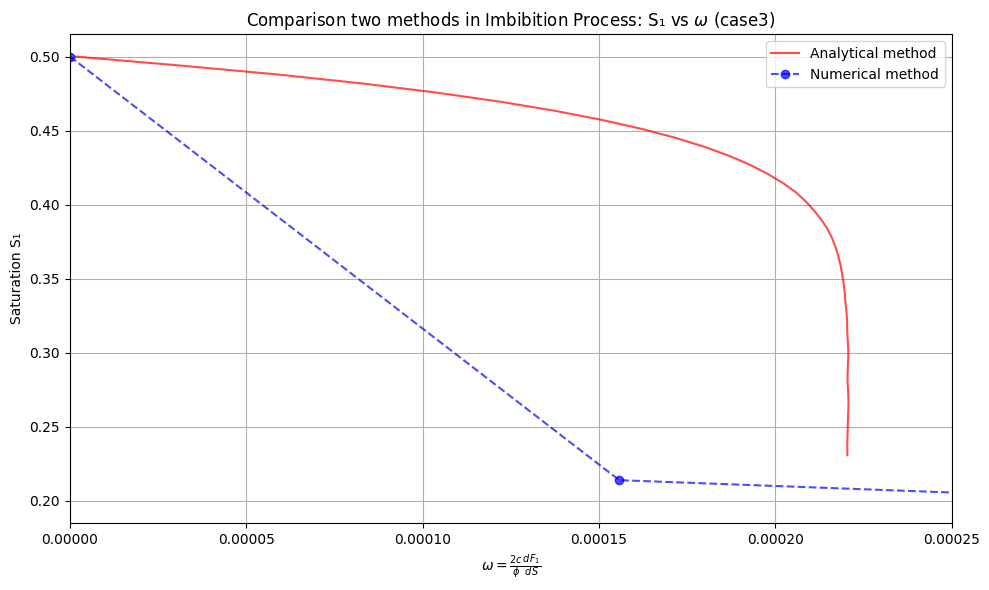

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.interpolate import interp1d

# ================================
# 公共参数 (Case 2 / Case 3)
# ================================
S1i    = 0.2      # 初始饱和度
S1_star = 0.5     # 最大（入口）饱和度
mu1    = 0.4e-3   # Pa·s
mu2    = 0.1e-3   # Pa·s
kr1_max = 0.4
kr2_max = 0.8
a      = 8.0
b      = 3.0
K      = 1e-13    # m²
Pc_max = 100000   # Pa
c      = 0.3      # 毛管压力指数
phi    = 0.25     # 孔隙度
S2r    = 0.15     # 非湿相残余饱和度

# ======================================================
# (一) Analytical Method: 解析法求 F1(S1) 与 ω = (2C/φ) dF1/dS1
# ======================================================
def compute_D(S1):
    """计算扩散系数 D(S1)"""
    denom = 1 - S2r - S1i
    Se = (S1 - S1i) / denom if denom != 0 else 0
    Se = np.clip(Se, 1e-10, 1-1e-10)
    kr1 = kr1_max * Se**a
    kr2 = kr2_max * (1 - Se)**b
    term = (S1_star / S1i)**(-c) - 1
    # 解析求导： dPc/dS1 = Pc_max * [ c*(S1/S1i)^(-c-1) / S1i ] / term
    dPc_dS1 = Pc_max * (c * (S1 / S1i)**(-c-1) / S1i) / term
    term1 = (kr1 / mu1) * (kr2 / mu2) / ((kr1 / mu1) + (kr2 / mu2))
    D = abs(term1 * K * dPc_dS1)
    return D

def compute_C2():
    """计算 C² = (φ/2) ∫[S1i, S1_star] (β - S1i) D(β) dβ"""
    integrand = lambda beta: (beta - S1i) * compute_D(beta)
    integral, _ = quad(integrand, S1i, S1_star, limit=100)
    C2 = (phi / 2) * integral
    return C2

def solve_F1(S1_range, num_iterations=50):
    """用 Picard 迭代求解 F1(S1)"""
    F1_values = (S1_range - S1i) / (S1_star - S1i)  # 初始猜测：线性分布
    for _ in range(num_iterations):
        F1_interp = interp1d(S1_range, F1_values, fill_value="extrapolate")
        C2 = compute_C2()
        C = np.sqrt(C2)
        for i, S1 in enumerate(S1_range):
            integrand = lambda beta: (beta - S1) * compute_D(beta) / F1_interp(beta)
            integral, _ = quad(integrand, S1, S1_star, limit=1000)
            F1_values[i] = 1 - (phi / (2 * C**2)) * integral
        F1_values = np.clip(F1_values, 0, 1)
    return F1_values, C

def compute_omega_analytical(S1_range, F1_values, C):
    """计算 ω(S1) = (2C/φ) dF1/dS1"""
    dF1_dS1 = np.gradient(F1_values, S1_range, edge_order=2)
    dF1_dS1 = np.clip(dF1_dS1, 1e-6, None)
    omega = (2 * C / phi) * dF1_dS1
    return omega

# 解析求解
S1_range = np.linspace(S1i, S1_star, 50)
F1_solution, C_solution = solve_F1(S1_range, num_iterations=50)
omega_analytical = compute_omega_analytical(S1_range, F1_solution, C_solution)

# ======================================================
# (二) Numerical Method: 显式有限差分求解 S1(x,t)
# ======================================================
def relative_permeability(S1, params):
    Se = (S1 - params['S1i']) / (1 - params['S2r'] - params['S1i'])
    Se = np.clip(Se, 0, 1)
    kr1 = params['kr1max'] * (Se ** params['a'])
    kr2 = params['kr2max'] * ((1 - Se) ** params['b'])
    return kr1, kr2

def capillary_pressure(S1, params):
    ratio = S1 / params['S1i']
    ratio_star = params['S1star'] / params['S1i']
    numerator = ratio_star ** (-params['c']) - ratio ** (-params['c'])
    denominator = ratio_star ** (-params['c']) - 1
    Pc = params['Pcmax'] * numerator / denominator
    return max(0, Pc)

def dPc_dS1_num(S1, params, delta=1e-6):
    if S1 <= params['S1i'] + delta:
        return (capillary_pressure(S1 + delta, params) - capillary_pressure(S1, params)) / delta
    else:
        return (capillary_pressure(S1 + delta, params) - capillary_pressure(S1 - delta, params)) / (2 * delta)

def diffusion_coefficient_num(S1, params):
    kr1_val, kr2_val = relative_permeability(S1, params)
    kr1_safe = max(1e-10, kr1_val)
    kr2_safe = max(1e-10, kr2_val)
    mobility1 = kr1_safe / params['mu1']
    mobility2 = kr2_safe / params['mu2']
    if mobility1 < 1e-10 or mobility2 < 1e-10:
        return 0
    D = - (mobility1 * mobility2) / (mobility1 + mobility2) * params['K'] * dPc_dS1_num(S1, params)
    return max(0, D)

def solve_imbibition_FD_explicit(params, L=1, T=6000, nx=100, nt=1000):
    """显式有限差分求解自发渗吸方程"""
    dx = L / (nx - 1)
    dt = T / nt
    x = np.linspace(0, L, nx)
    t = np.linspace(0, T, nt)
    S = np.ones((nt, nx)) * params['S1i']
    S[:, 0] = params['S1star']  # 左边界固定
    for n in range(nt - 1):
        for i in range(1, nx - 1):
            D_plus = diffusion_coefficient_num(0.5*(S[n,i] + S[n,i+1]), params)
            D_minus = diffusion_coefficient_num(0.5*(S[n,i] + S[n,i-1]), params)
            flux_plus = D_plus * (S[n,i+1] - S[n,i])
            flux_minus = D_minus * (S[n,i] - S[n,i-1])
            S[n+1, i] = S[n, i] + dt/(params['phi']*dx*dx) * (flux_plus - flux_minus)
        S[n+1, 0] = params['S1star']
        S[n+1, -1] = S[n+1, -2]
        S[n+1, :] = np.clip(S[n+1, :], params['S1i'], params['S1star'])
    return x, t, S

# 数值方法参数字典（与上面公共参数相同）
num_params = {
    'S1i': S1i,
    'S1star': S1_star,
    'mu1': mu1,
    'mu2': mu2,
    'kr1max': kr1_max,
    'kr2max': kr2_max,
    'a': a,
    'b': b,
    'K': K,
    'phi': phi,
    'Pcmax': Pc_max,
    'c': c,
    'S2r': S2r
}

# 数值求解
x_num, t_num, S_num = solve_imbibition_FD_explicit(num_params)
t_index = 700  # 选择某个时刻
t_sel = t_num[t_index]
S_at_t = S_num[t_index, :]
omega_numerical = x_num / np.sqrt(t_sel)  # 此处 w = x/√t

# ======================================================
# 将两种方法的 S₁ vs w 曲线合并到一张图中
# ======================================================
plt.figure(figsize=(10,6))
plt.plot(omega_analytical, S1_range, 'r-', label='Analytical method',alpha=0.7)
plt.plot(omega_numerical, S_at_t, 'bo--', label='Numerical method',alpha=0.7)
plt.xlim(0, 0.00025)
plt.xlabel(r'$\omega=\frac{2c}{\phi}\frac{dF_1}{dS}$')
plt.ylabel('Saturation S₁')
plt.title('Comparison two methods in Imbibition Process: S₁ vs $\omega$ (case3)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
